In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing

In [2]:
test_df = pd.read_csv("test_dataset_without_labels.csv", encoding='utf-16-le')
test_df

,vba_code
0,"Private Sub getCIA(C As String, I As String, A..."
1,Private Sub Workbook_Open()\n Application.C...
2,'APMP\n'KILL\nPrivate Sub Document_Open()\n ...
3,Private Sub Workbook_Activate()\n Call AddM...
4,Private Sub CheckBox1_Click()\n\nEnd Sub\n\nPr...
...,...
10625,Private Sub CommandButton1_Click()\nDim s As A...
10626,Sub AutoOpen()\n\nMyMacro\n\nEnd Sub\n\nSub Do...
10627,Private Sub CommandButton1_Click()\n With A...
10628,Private Const FOSMgcqLTaUItxmhNrJ As String = ...


In [3]:
test_df.isnull().sum()

vba_code    0
dtype: int64

In [4]:
validation_df = pd.read_csv("validation_dataset.csv", encoding='utf-16-le')
validation_df

,label,vba_code
0,mal,Function SleekM()\nOn Error Resume Next\n Se...
1,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
2,white,"'Sub AutoExec() 'ð2¾(\n'ds = MsgBox(""#Wzh..."
3,white,Private Sub CommandButton1_Click()\nCall Clear...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
...,...,...
10624,mal,Sub Auto_Open()\nApplication.EnableCancelKey =...
10625,white,"Private Sub UserForm_Initialize()\nTXTpath = ""..."
10626,white,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...
10627,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...


In [5]:
validation_df.isnull().sum()

label       0
vba_code    0
dtype: int64

In [6]:
train_df = pd.read_csv("train_dataset.csv", encoding='utf-16-le')
train_df

,label,vba_code
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...
1,white,Option Explicit\nOption Explicit\nOption Expli...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...


In [7]:
train_df.isnull().sum()

label       0
vba_code    0
dtype: int64

In [8]:
np.unique(train_df.label) 

array(['mal', 'white'], dtype=object)

In [9]:
train_df.vba_code

0        Private Sub Workbook_BeforeClose(Cancel As Boo...
1        Option Explicit\nOption Explicit\nOption Expli...
2        'Option Explicit\nPrivate Sub Workbook_BeforeC...
3        'Option Explicit\nPrivate Sub Workbook_BeforeC...
4        'Option Explicit\nPrivate Sub Workbook_BeforeC...
                               ...                        
31883    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884    Option Explicit\n\nPrivate Sub Workbook_Open()...
31885    Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31887    'Option Explicit\nPrivate Sub Workbook_BeforeC...
Name: vba_code, Length: 31888, dtype: object

In [10]:
# train_df.vba_code[2]

In [11]:
# Remove comments
train_df['vba_code_without_comments'] = train_df['vba_code'].apply(lambda x: re.sub(r"'.*?$", "", x, flags=re.MULTILINE))
train_df

,label,vba_code,vba_code_without_comments
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...


In [12]:
# Remove comments
validation_df['vba_code_without_comments'] = validation_df['vba_code'].apply(lambda x: re.sub(r"'.*?$", "", x, flags=re.MULTILINE))
validation_df

,label,vba_code,vba_code_without_comments
0,mal,Function SleekM()\nOn Error Resume Next\n Se...,Function SleekM()\nOn Error Resume Next\n Se...
1,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
2,white,"'Sub AutoExec() 'ð2¾(\n'ds = MsgBox(""#Wzh...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,white,Private Sub CommandButton1_Click()\nCall Clear...,Private Sub CommandButton1_Click()\nCall Clear...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
...,...,...,...
10624,mal,Sub Auto_Open()\nApplication.EnableCancelKey =...,Sub Auto_Open()\nApplication.EnableCancelKey =...
10625,white,"Private Sub UserForm_Initialize()\nTXTpath = ""...","Private Sub UserForm_Initialize()\nTXTpath = ""..."
10626,white,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...
10627,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...


In [13]:
# make one clean line
def clean_script(script):
    # Remove special characters and reduce consecutive spaces
    cleaned_script = re.sub(r'\s+', ' ', script)
    # Remove tabs and newlines
    cleaned_script = cleaned_script.replace('\t', ' ').replace('\n', ' ')
    # Remove punctuation and convert to lowercase
    cleaned_script = re.sub(r'[^\w\s]', ' ', cleaned_script).lower()
    return cleaned_script

In [14]:
# Apply the cleaning function to the 'vba_code' column
train_df['cleaned_vba_code'] = train_df['vba_code_without_comments'].apply(clean_script)
validation_df['cleaned_vba_code'] = validation_df['vba_code_without_comments'].apply(clean_script)

In [15]:
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

# Tokenize the text data
tokenized_data = [doc.split() for doc in train_df['vba_code']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=160, window=5, min_count=1, workers=4)

# Function to aggregate word vectors for each document
def aggregate_word_vectors(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return [0] * model.vector_size  # return zero vector if no valid word vectors
    return sum(vectors) / len(vectors)  # averaging the word vectors

# Aggregate word vectors for each document in the training set
X_train_word2vec = [aggregate_word_vectors(tokens, word2vec_model) for tokens in tokenized_data]

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])

# Tokenize and aggregate word vectors for the test set
tokenized_val_data = [doc.split() for doc in validation_df['vba_code']]
X_val_word2vec = [aggregate_word_vectors(tokens, word2vec_model) for tokens in tokenized_val_data]

# Convert labels to numerical values for testing
y_val = label_encoder.transform(validation_df['label'])

In [16]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [17]:
y_val

array([0, 0, 1, ..., 1, 0, 1])

In [18]:
# Convert Word2Vec features to DataFrames
X_train_word2vec_df = pd.DataFrame(X_train_word2vec, columns=[f'w2v_{i}' for i in range(len(X_train_word2vec[0]))])
X_val_word2vec_df = pd.DataFrame(X_val_word2vec, columns=[f'w2v_{i}' for i in range(len(X_val_word2vec[0]))])

In [19]:
X_train_word2vec_df

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,w2v_150,w2v_151,w2v_152,w2v_153,w2v_154,w2v_155,w2v_156,w2v_157,w2v_158,w2v_159
0,1.379952,-0.404144,-0.114719,0.123062,-0.416614,0.585756,2.007678,-0.603845,1.164975,0.833141,...,0.099726,-0.191252,0.904036,0.105118,-0.250585,-0.190907,0.784672,0.638326,0.412674,-1.332388
1,1.127564,-0.006402,0.392313,-0.270501,-0.635309,0.367576,1.812395,-0.418225,0.216901,0.218041,...,0.301413,-0.788691,1.056886,-0.153937,-0.583216,-0.000309,0.211937,1.733049,0.306125,-0.817831
2,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,0.117695,-0.452868,0.027633,0.181049,-0.332476,-0.434492,0.817592,0.941565,-0.050773,-0.877502
3,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,0.117695,-0.452868,0.027633,0.181049,-0.332476,-0.434492,0.817592,0.941565,-0.050773,-0.877502
4,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,0.117695,-0.452868,0.027633,0.181049,-0.332476,-0.434492,0.817592,0.941565,-0.050773,-0.877502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,0.117695,-0.452868,0.027633,0.181049,-0.332476,-0.434492,0.817592,0.941565,-0.050773,-0.877502
31884,1.334747,-0.275510,0.280479,-0.024557,-0.714249,0.037541,1.644812,0.636348,0.038094,0.747442,...,0.646273,-0.811740,1.064067,-0.351961,-0.981924,0.045842,0.558309,1.665505,0.720218,-0.917245
31885,0.718768,-0.297395,0.544948,0.058178,-0.412224,0.429756,2.456184,-0.792411,1.079800,0.943912,...,0.007660,-0.804697,1.017375,0.312024,-0.557196,-0.214765,0.620654,1.206085,0.718358,-1.500787
31886,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,0.117695,-0.452868,0.027633,0.181049,-0.332476,-0.434492,0.817592,0.941565,-0.050773,-0.877502


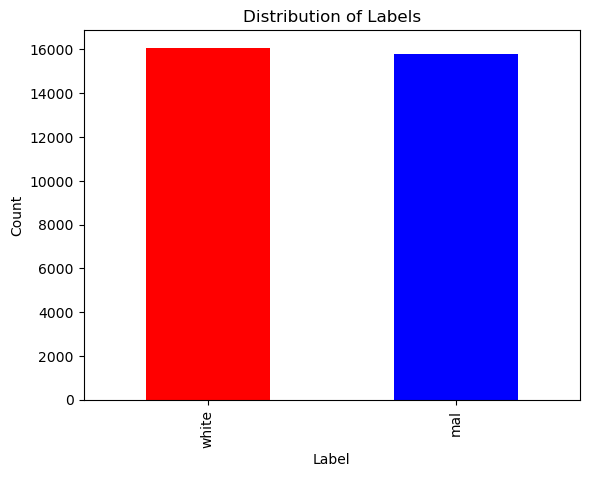

In [20]:
label_counts = train_df['label'].value_counts()
label_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [21]:
# duplicates = train_df[train_df.duplicated()]

# if duplicates.shape[0] > 0:
#     print(duplicates)

In [22]:
# # Remove all duplicate rows based on all columns
# train_df.drop_duplicates(inplace=True)

# # If you want to remove duplicates based on specific columns, you can use the subset parameter
# # For example, to remove duplicates based on the 'vba_code' column:
# train_df.drop_duplicates(subset=['vba_code'], inplace=True)
# train_df

In [23]:
# # Assuming 'label' is the column containing 'mal' and 'white' values
# label_counts = train_df['label'].value_counts()

# # Plotting the counts
# label_counts.plot(kind='bar', color=['red', 'blue'])
# plt.title('Distribution of Labels')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

### Extracting features

In [24]:
# mal = train_df[train_df['label'] == 'mal']
# white = train_df[train_df['label'] == 'white']
# mal.vba_code

In [25]:
# !pip install oletools

In [26]:
# basic obfuscation or not (use de-obfuscation methods if yes)
obfuscation_indicators = [
    'Chr(', 'Hex(', 'Execute(', 'Base64Decode(',
    'Environ(', 'Shell(', 'WScript.Shell', 'GetFile(', 'MSXML2.ServerXMLHTTP', 
    'CreateObject("MSXML2.XMLHTTP")', 'CreateObject("ADODB.Stream")', 
    'Randomize', 'Replace(', 'StrReverse(', 'CallByName(', 'GetObject(',
    'Xor', 'vbuicode', 'vbfromunicode', 'If False Then ... End If'
    ]

# Define a function to check for the presence of obfuscation indicators
def is_obfuscated(code):
    for indicator in obfuscation_indicators:
        if indicator in code:
            return 1
    return 0

In [27]:
train_df['is_obfuscated'] = train_df['vba_code'].apply(is_obfuscated)
# train_df

In [28]:
train_df[train_df['label'] == 'white']['is_obfuscated'].value_counts()

is_obfuscated
0    14108
1     1970
Name: count, dtype: int64

In [29]:
train_df[train_df['label'] == 'mal']['is_obfuscated'].value_counts()

is_obfuscated
1    12761
0     3049
Name: count, dtype: int64

In [30]:
# Text Length
train_df['code_length'] = train_df['vba_code'].apply(len)
# train_df

In [31]:
# Number of Linens
train_df['num_lines'] = train_df['vba_code'].apply(lambda x: x.count('\n') + 1)
# train_df

In [32]:
# Syntax Complexity: average number of characters per line
train_df['avg_chars_per_line'] = train_df.apply(lambda row: row['code_length'] / row['num_lines'] if row['num_lines'] > 0 else 0, axis=1)
# train_df

In [33]:
# Use of Punctuation
train_df['num_exclamation_marks'] = train_df.apply(lambda row: row['vba_code'].count('!') / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [34]:
# Language Features
train_df['num_loops'] = train_df['vba_code'].apply(lambda x: x.count('For') + x.count('While'))
# train_df

In [35]:
# Loops per Character Length
train_df['num_loops_length'] = train_df.apply(lambda row: (row['vba_code'].count('For ') + row['vba_code'].count('While')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [36]:
# Function/Procedure Count
train_df['num_functions'] = train_df['vba_code'].apply(lambda x: x.count('Sub ') + x.count('Function '))
# train_df

In [37]:
# Functions per Character Length:
train_df['num_functions'] = train_df.apply(lambda row: (row['vba_code'].count('Sub ') + row['vba_code'].count('Function ')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [38]:
# Numeric Literal Count (using regular expression)
train_df['num_numeric_literals'] = train_df.apply(lambda row: len(re.findall(r'\b\d+\b', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [39]:
# String Literal Count
train_df['num_string_literals'] = train_df.apply(lambda row: len(re.findall(r'"([^"]*)"', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
# train_df

In [40]:
# Error Handling Presence
train_df['has_error_handling'] = train_df['vba_code'].apply(lambda x: 1 if 'On Error' in x else 0)
# train_df

In [41]:
# Define a function to check for the presence of URLs or IPs
def has_url_or_ip(code):
    # Regular expression pattern to match URLs or IPs
    pattern = re.compile(r'(https?://|ftp://|www\.)|((25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)')

    # Check if the pattern is found in the code
    return 1 if pattern.search(code) else 0

In [42]:
train_df['has_url_or_ip'] = train_df['vba_code'].apply(has_url_or_ip)
# train_df

In [43]:
# private libraries (passwords, and personal data..)
information_disclosure_keywords = ['winmgmts', 'Win32_Process', 'shell', 
                                   'ssn', 'secret', 'pwd', 'shadow', 'bypass', 
                                  'EvilClippy', 'Base64Decode', 'CreateObject',
                                  'CommandLine', 'Auto_open', 'Replace', 'Based',
                                  'Worksheet_Change', 'bin.base64', 'xor', 'GetFile',
                                  'Shell', 'DownloadFile', 'Eval']

# Define a function to check for the presence of information disclosure keywords
def has_information_disclosure(code):
    for keyword in information_disclosure_keywords:
        if keyword in code.lower():
            return 1
    return 0

In [44]:
train_df['has_information_disclosure'] = train_df['vba_code'].apply(has_information_disclosure)
# train_df

In [45]:
# train_df['has_information_disclosure'].value_counts()
train_df[train_df['label'] == 'mal']['has_information_disclosure'].value_counts()

has_information_disclosure
1    13987
0     1823
Name: count, dtype: int64

In [46]:
train_df[train_df['label'] == 'white']['has_information_disclosure'].value_counts()

has_information_disclosure
0    11677
1     4401
Name: count, dtype: int64

In [47]:
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,is_obfuscated,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclose cancel as boo...,0,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,0,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,1,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,1,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,1,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,1,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open ap...,0,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,0,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,1,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1


### visualization

In [48]:
mal = train_df[train_df['label'] == 'mal']
white = train_df[train_df['label'] == 'white']

In [49]:
# train_df['label'] = train_df['label'].replace('white',1, regex=True) 
# train_df['label'] = train_df['label'].replace('mal',0, regex=True) 
train_df = train_df.drop('label', axis=1)

In [50]:
train_df.columns

Index(['vba_code', 'vba_code_without_comments', 'cleaned_vba_code',
       'is_obfuscated', 'code_length', 'num_lines', 'avg_chars_per_line',
       'num_exclamation_marks', 'num_loops', 'num_loops_length',
       'num_functions', 'num_numeric_literals', 'num_string_literals',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure'],
      dtype='object')

In [51]:
col = ['code_length', 'num_lines', 'avg_chars_per_line',
       'num_exclamation_marks', 'num_loops', 'num_loops_length',
       'num_functions', 'num_numeric_literals', 'num_string_literals',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure',
       'is_obfuscated']
corr_df = train_df[col]
corr_df

,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure,is_obfuscated
0,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1,0
1,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1,0
2,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
3,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
4,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
31884,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1,0
31885,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,0,0
31886,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1


<Axes: >

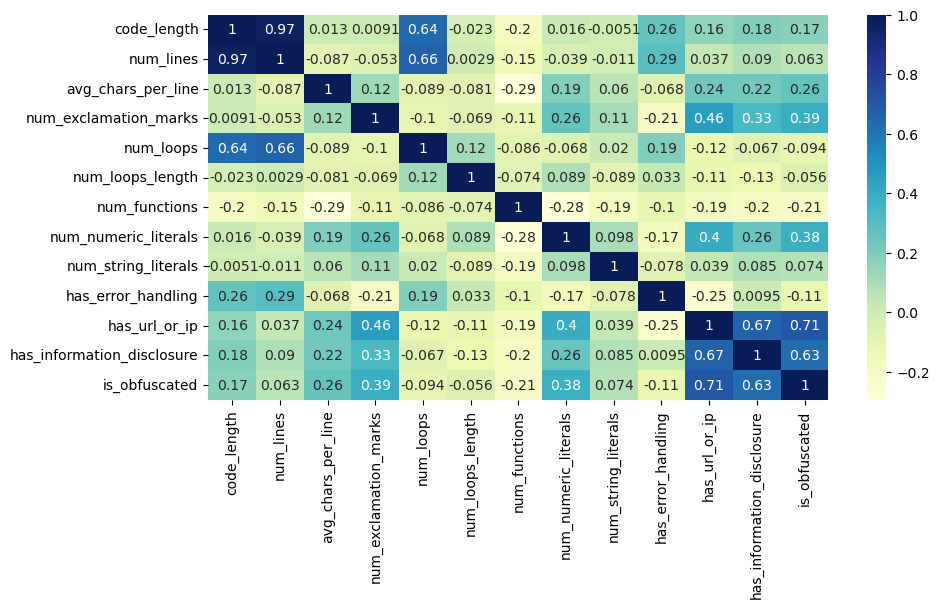

In [52]:
#correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(),annot=True,cmap="YlGnBu")

In [53]:
train_df['has_url_or_ip'].value_counts()

has_url_or_ip
0    19072
1    12816
Name: count, dtype: int64

In [54]:
train_df['is_obfuscated'].value_counts()

is_obfuscated
0    17157
1    14731
Name: count, dtype: int64

In [55]:
train_df['has_error_handling'].value_counts()

has_error_handling
0    25244
1     6644
Name: count, dtype: int64

In [56]:
train_df['has_information_disclosure'].value_counts()

has_information_disclosure
1    18388
0    13500
Name: count, dtype: int64

Text(0.5, 1.0, 'Distributional of length')

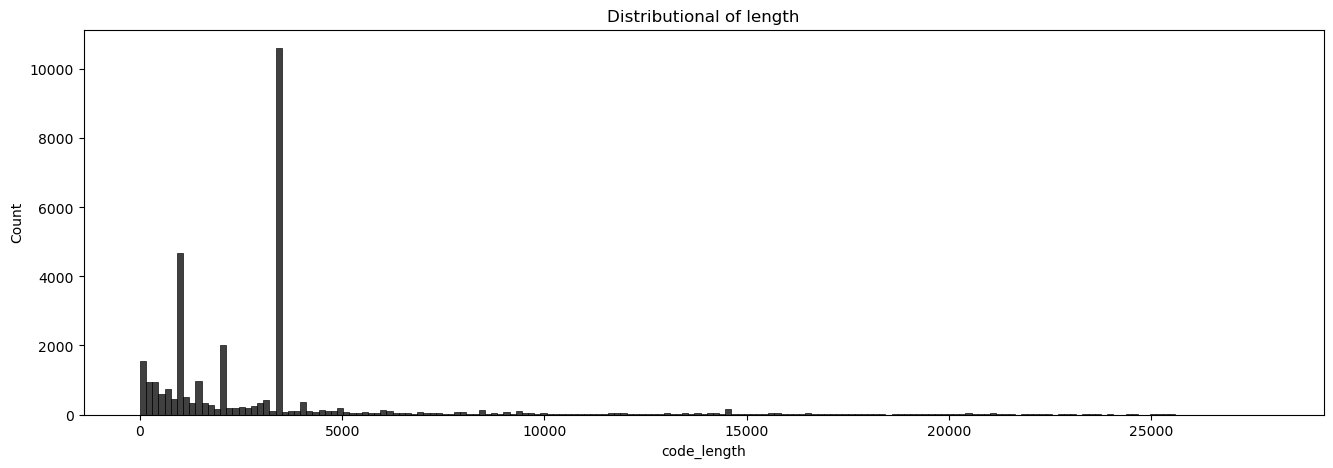

In [57]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.histplot(train_df['code_length'], color="black",ax = axes)
plt.title("Distributional of length")

<Axes: xlabel='code_length', ylabel='num_loops'>

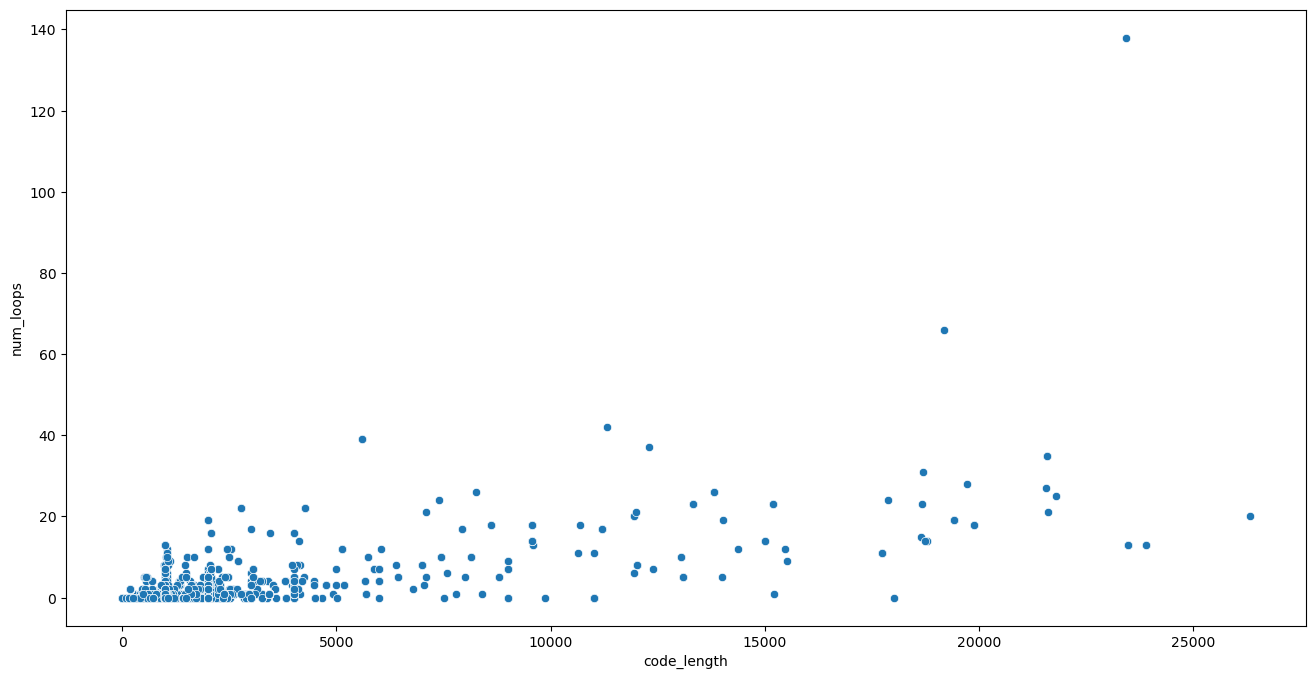

In [58]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = mal['code_length'], y = mal['num_loops'])

<Axes: xlabel='code_length', ylabel='num_loops'>

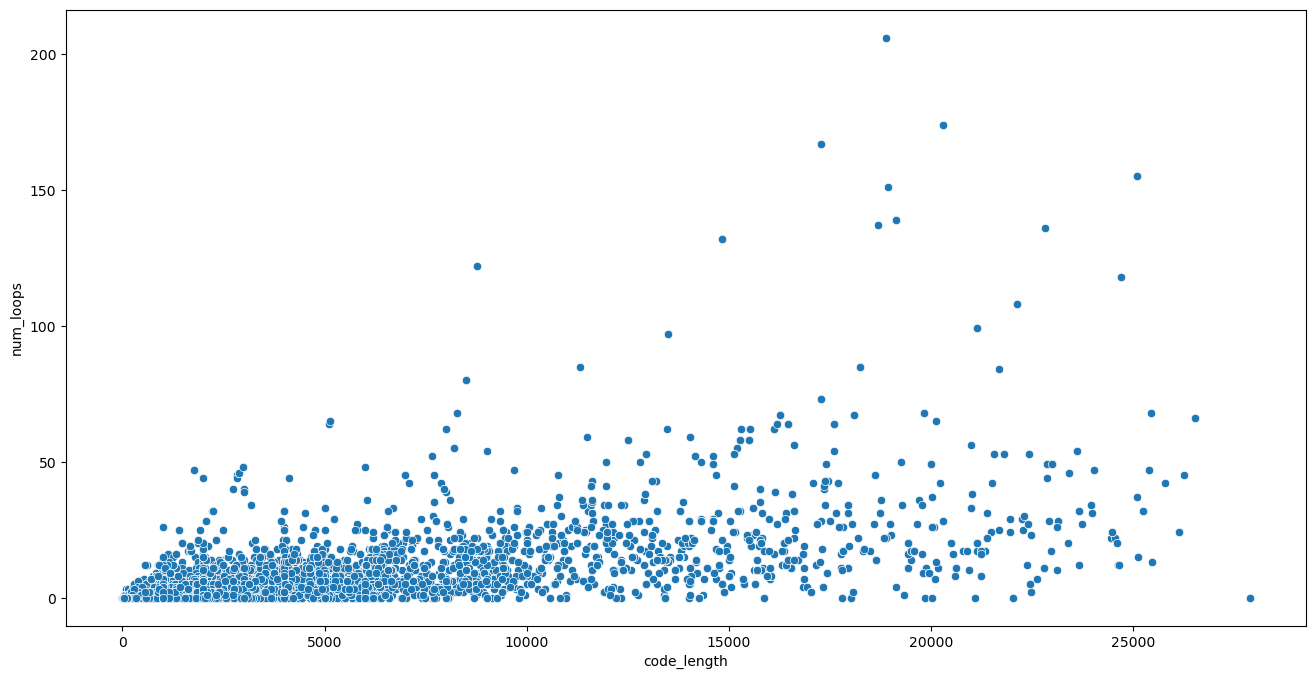

In [59]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = white['code_length'], y = white['num_loops'])

<Axes: xlabel='is_obfuscated', ylabel='count'>

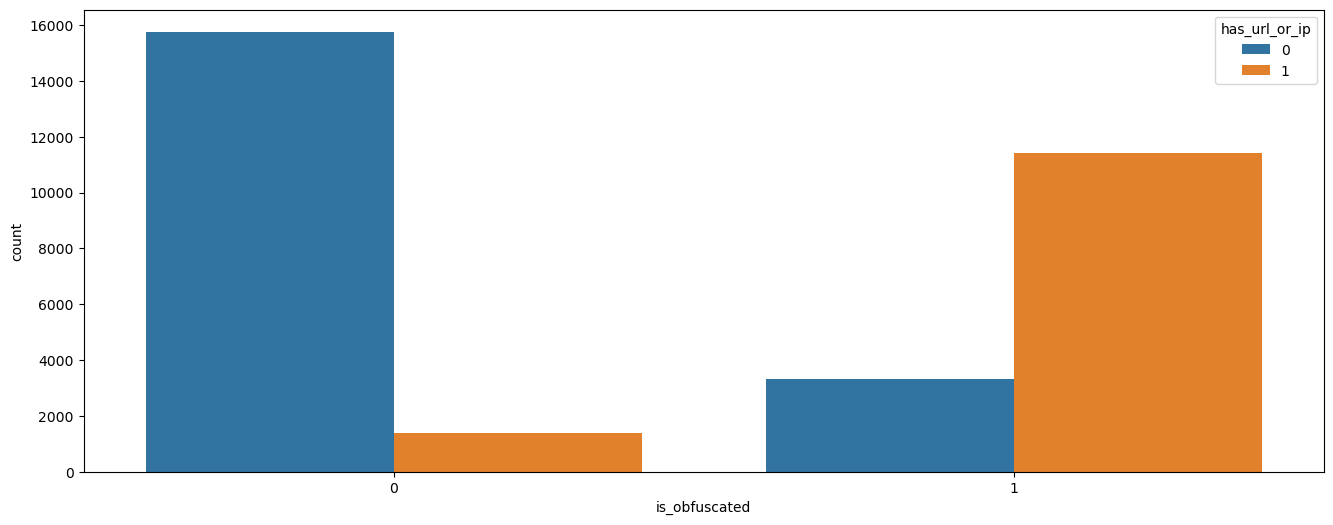

In [60]:
plt.figure(figsize=(16, 6))
sns.countplot(x='is_obfuscated', hue='has_url_or_ip', data=train_df)

# Features selection

In [61]:
# PCA, VarianceThreshold, SelectKBest, Tree-based feature selection

### VarianceThreshold

In [62]:
X = corr_df

threshold_value = .8 * (1 - .8)
vt = VarianceThreshold(threshold=threshold_value)

X_filtered = vt.fit_transform(X)

In [63]:
selected_features = X.columns[vt.get_support()]
selected_features

Index(['code_length', 'num_lines', 'avg_chars_per_line', 'num_loops',
       'has_error_handling', 'has_url_or_ip', 'has_information_disclosure',
       'is_obfuscated'],
      dtype='object')

### Principal component analysis (PCA)

In [64]:
X = corr_df
pca = PCA(n_components=7)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.99906634e-01 7.37109142e-05 1.66746023e-05 2.92534109e-06
 3.09000040e-08 1.26548249e-08 6.96226180e-09]
[6.32605115e+05 5.43148861e+03 2.58333493e+03 1.08203480e+03
 1.11207030e+02 7.11673908e+01 5.27871420e+01]


In [65]:
coloumns = ['code_length', 'num_lines', 'avg_chars_per_line', 'num_loops',
        'has_error_handling', 'has_url_or_ip', 'is_obfuscated', 'num_string_literals',
        'has_information_disclosure', 'num_numeric_literals', 'num_exclamation_marks', 'num_functions']
train = train_df[coloumns]
train

,code_length,num_lines,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals,num_exclamation_marks,num_functions
0,1070,34,31.470588,0,0,0,0,0.005607,1,0.001869,0.000000,0.003738
1,13092,420,31.171429,23,1,0,0,0.006416,1,0.008631,0.000229,0.002215
2,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
3,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
4,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
...,...,...,...,...,...,...,...,...,...,...,...,...
31883,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
31884,12274,402,30.532338,23,1,0,0,0.003748,1,0.007414,0.000244,0.003340
31885,1000,42,23.809524,0,1,0,0,0.000000,0,0.000000,0.000000,0.006000
31886,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334


In [66]:
def set_data(df):
    df['code_length'] = df['vba_code'].apply(len)
    df['num_lines'] = df['vba_code'].apply(lambda x: x.count('\n') + 1)
    df['avg_chars_per_line'] = df.apply(lambda row: row['code_length'] / row['num_lines'] if row['num_lines'] > 0 else 0, axis=1)
    df['num_loops'] = df['vba_code'].apply(lambda x: x.count('For') + x.count('While'))
    df['has_error_handling'] = df['vba_code'].apply(lambda x: 1 if 'On Error' in x else 0)
    df['has_url_or_ip'] = df['vba_code'].apply(has_url_or_ip)
    df['is_obfuscated'] = df['vba_code'].apply(is_obfuscated)
    df['num_string_literals'] = df.apply(lambda row: len(re.findall(r'"([^"]*)"', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
    df['has_information_disclosure'] = df['vba_code'].apply(has_information_disclosure)
    df['num_numeric_literals'] = df.apply(lambda row: len(re.findall(r'\b\d+\b', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
    df['num_exclamation_marks'] = df.apply(lambda row: row['vba_code'].count('!') / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
    df['num_functions'] = df.apply(lambda row: (row['vba_code'].count('Sub ') + row['vba_code'].count('Function ')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
    
#     df = df.drop('vba_code', axis=1)
    return df

In [67]:
validation = set_data(validation_df)
test = set_data(test_df)

In [68]:
validation

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals,num_exclamation_marks,num_functions
0,mal,Function SleekM()\nOn Error Resume Next\n Se...,Function SleekM()\nOn Error Resume Next\n Se...,function sleekm on error resume next select ...,1425,48,29.687500,0,1,0,0,0.000000,0,0.007719,0.000000,0.001404
1,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
2,white,"'Sub AutoExec() 'ð2¾(\n'ds = MsgBox(""#Wzh...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,,393,28,14.035714,0,0,0,0,0.002545,0,0.007634,0.002545,0.020356
3,white,Private Sub CommandButton1_Click()\nCall Clear...,Private Sub CommandButton1_Click()\nCall Clear...,private sub commandbutton1_click call cleare...,726,23,31.565217,1,0,0,0,0.011019,0,0.004132,0.000000,0.004132
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10624,mal,Sub Auto_Open()\nApplication.EnableCancelKey =...,Sub Auto_Open()\nApplication.EnableCancelKey =...,sub auto_open application enablecancelkey ...,1000,26,38.461538,1,1,0,1,0.011000,1,0.004000,0.001000,0.002000
10625,white,"Private Sub UserForm_Initialize()\nTXTpath = ""...","Private Sub UserForm_Initialize()\nTXTpath = ""...",private sub userform_initialize txtpath c...,5924,250,23.696000,13,0,0,1,0.006077,0,0.019750,0.000000,0.001519
10626,white,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...,private sub spinbutton1_change end sub priva...,11879,505,23.522772,6,0,0,0,0.014143,1,0.017594,0.000000,0.004630
10627,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclose cancel as bo...,3428,86,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334


In [69]:
test

,vba_code,code_length,num_lines,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals,num_exclamation_marks,num_functions
0,"Private Sub getCIA(C As String, I As String, A...",6190,237,26.118143,0,0,0,0,0.016963,0,0.009047,0.000000,0.003231
1,Private Sub Workbook_Open()\n Application.C...,2997,90,33.300000,5,0,0,0,0.007007,1,0.001001,0.000000,0.004004
2,'APMP\n'KILL\nPrivate Sub Document_Open()\n ...,718,20,35.900000,0,1,0,0,0.002786,1,0.015320,0.000000,0.001393
3,Private Sub Workbook_Activate()\n Call AddM...,6182,229,26.995633,5,0,0,0,0.014882,0,0.004368,0.001779,0.002103
4,Private Sub CheckBox1_Click()\n\nEnd Sub\n\nPr...,2690,97,27.731959,0,0,0,0,0.001859,1,0.000000,0.000000,0.005204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,Private Sub CommandButton1_Click()\nDim s As A...,351,8,43.875000,0,0,0,0,0.002849,0,0.000000,0.000000,0.002849
10626,Sub AutoOpen()\n\nMyMacro\n\nEnd Sub\n\nSub Do...,652,34,19.176471,0,0,1,0,0.006135,1,0.003067,0.000000,0.004601
10627,Private Sub CommandButton1_Click()\n With A...,1000,37,27.027027,0,0,0,0,0.008000,0,0.004000,0.000000,0.003000
10628,Private Const FOSMgcqLTaUItxmhNrJ As String = ...,1000,14,71.428571,0,0,0,0,0.013000,0,0.011000,0.000000,0.000000


# Training (Models)

In [70]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [71]:
# # white = 1, mal = 0
# validation['label'] = validation['label'].replace('white',1, regex=True) 
# validation['label'] = validation['label'].replace('mal',0, regex=True) 
# # Convert labels to numerical values for testing
# y_val = label_encoder.transform(validation_df['label'])

In [72]:
X_train = train
X_val = validation.drop(['label', 'vba_code_without_comments', 'cleaned_vba_code', 'vba_code'], axis=1)

In [73]:
# Concatenate additional features with Word2Vec features
X_train_combined = pd.concat([X_train_word2vec_df, X_train], axis=1)
X_val_combined = pd.concat([X_val_word2vec_df, X_val], axis=1)

In [74]:
X_train_combined

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals,num_exclamation_marks,num_functions
0,1.379952,-0.404144,-0.114719,0.123062,-0.416614,0.585756,2.007678,-0.603845,1.164975,0.833141,...,31.470588,0,0,0,0,0.005607,1,0.001869,0.000000,0.003738
1,1.127564,-0.006402,0.392313,-0.270501,-0.635309,0.367576,1.812395,-0.418225,0.216901,0.218041,...,31.171429,23,1,0,0,0.006416,1,0.008631,0.000229,0.002215
2,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
3,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
4,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
31884,1.334747,-0.275510,0.280479,-0.024557,-0.714249,0.037541,1.644812,0.636348,0.038094,0.747442,...,30.532338,23,1,0,0,0.003748,1,0.007414,0.000244,0.003340
31885,0.718768,-0.297395,0.544948,0.058178,-0.412224,0.429756,2.456184,-0.792411,1.079800,0.943912,...,23.809524,0,1,0,0,0.000000,0,0.000000,0.000000,0.006000
31886,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334


In [75]:
X_val_combined

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,avg_chars_per_line,num_loops,has_error_handling,has_url_or_ip,is_obfuscated,num_string_literals,has_information_disclosure,num_numeric_literals,num_exclamation_marks,num_functions
0,1.044825,-0.950434,0.525197,0.042420,-1.959631,-0.139926,0.802498,0.785084,-0.903476,1.945734,...,29.687500,0,1,0,0,0.000000,0,0.007719,0.000000,0.001404
1,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
2,0.968613,0.688263,0.400054,-0.349592,0.508506,0.659379,1.876503,-0.774292,0.203838,0.480417,...,14.035714,0,0,0,0,0.002545,0,0.007634,0.002545,0.020356
3,1.558774,-0.907443,-0.316329,-0.190988,-0.611309,0.064542,2.504100,-0.621419,0.912966,0.871504,...,31.565217,1,0,0,0,0.011019,0,0.004132,0.000000,0.004132
4,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10624,2.178883,-0.451389,0.944701,0.557304,-0.312922,-0.527827,0.583529,0.249213,-0.484475,-0.108178,...,38.461538,1,1,0,1,0.011000,1,0.004000,0.001000,0.002000
10625,0.947297,-0.536988,0.387937,0.361348,-0.857975,-0.284090,1.289407,0.338367,0.096591,0.756585,...,23.696000,13,0,0,1,0.006077,0,0.019750,0.000000,0.001519
10626,1.263960,0.056860,0.181426,-0.769939,-0.114655,-0.128420,2.365193,-0.259823,0.013692,0.983314,...,23.522772,6,0,0,0,0.014143,1,0.017594,0.000000,0.004630
10627,1.575465,0.033527,0.022240,0.545521,-0.183493,-0.475016,1.600226,-0.016880,0.537478,0.753425,...,39.860465,1,0,1,1,0.008460,1,0.019253,0.002042,0.002334


In [76]:
# # split
# X_train = X_train_combined
# X_val = X_val_combined

### Gaussian Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_combined, y_train)
gnb_pred = gnb.predict(X_val_combined)
print(metrics.accuracy_score(y_val, gnb_pred))

0.8144698466459686


In [78]:
report = classification_report(y_val, gnb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      5320
           1       0.79      0.86      0.82      5309

    accuracy                           0.81     10629
   macro avg       0.82      0.81      0.81     10629
weighted avg       0.82      0.81      0.81     10629



### Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_combined, y_train)
dtc_pred = dtc.predict(X_val_combined)
print(metrics.accuracy_score(y_val, dtc_pred))

0.986734405870731


In [80]:
report = classification_report(y_val, dtc_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5320
           1       0.99      0.98      0.99      5309

    accuracy                           0.99     10629
   macro avg       0.99      0.99      0.99     10629
weighted avg       0.99      0.99      0.99     10629



## Ensemble learning

### Random Forest Classification

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_combined, y_train)
rfc_pred = rfc.predict(X_val_combined)
print(metrics.accuracy_score(y_val, rfc_pred))
print(classification_report(y_val, rfc_pred))

0.9938846551886349
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5320
           1       0.99      1.00      0.99      5309

    accuracy                           0.99     10629
   macro avg       0.99      0.99      0.99     10629
weighted avg       0.99      0.99      0.99     10629



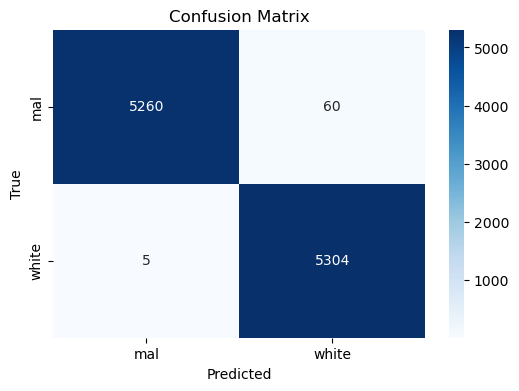

In [82]:
con_mat = confusion_matrix(y_val, rfc_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_combined, y_train)
y_val_pred = gb_clf.predict(X_val_combined)
print("Test Accuracy:", accuracy_score(y_val, y_val_pred))

Test Accuracy: 0.9773261830840154


### xgboost

In [84]:
# !pip install xgboost

In [85]:
import xgboost
xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train_combined, y_train)
xgb_pred = xgb_clf.predict(X_val_combined)

In [86]:
print("xgboost score: ", xgb_clf.score(X_val_combined, y_val)*100)
print(classification_report(y_val, xgb_pred))

xgboost score:  99.51077241509078
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5320
           1       0.99      1.00      1.00      5309

    accuracy                           1.00     10629
   macro avg       1.00      1.00      1.00     10629
weighted avg       1.00      1.00      1.00     10629



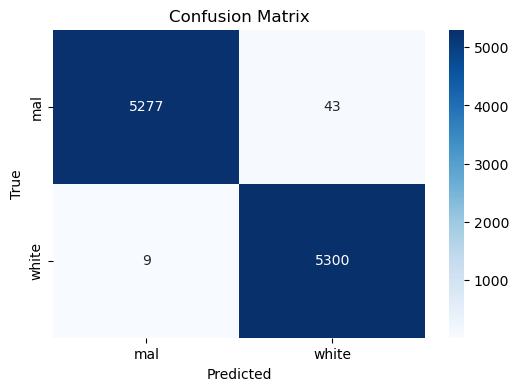

In [87]:
con_mat = confusion_matrix(y_val, xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### AdaBoost

In [88]:
# from sklearn.ensemble import AdaBoostClassifier
# adaboost_model = AdaBoostClassifier(n_estimators=500)
# adaboost_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_test_pred = adaboost_model.predict(X_val)

# # Evaluate the model
# print("Test Accuracy:", accuracy_score(y_val, y_test_pred))
# print("\nClassification Report:\n", classification_report(y_val, y_test_pred))

In [89]:
# cm = confusion_matrix(y_val, y_test_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# Try PCA

In [90]:
# X_val_word2vec_df
# X_train_word2vec_df

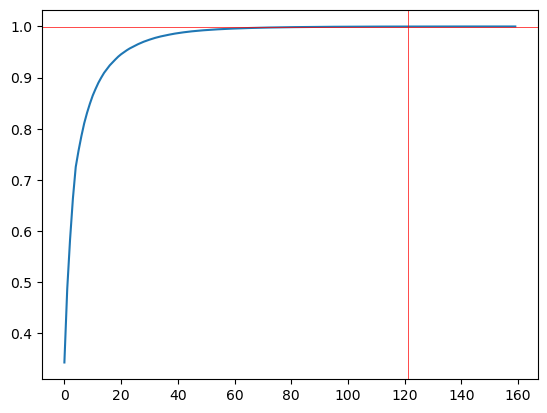

In [91]:
pca = PCA()
pca.fit(X_train_word2vec_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.axhline(y=0.9999, linewidth=0.5, color='r');
plt.axvline(x=121, linewidth=0.5, color='r');

In [92]:
pca = PCA(n_components=0.9999)
X_train_reduced = pca.fit_transform(X_train_word2vec_df)
X_val_reduced = pca.transform(X_val_word2vec_df)

In [93]:
pca.n_components_

121

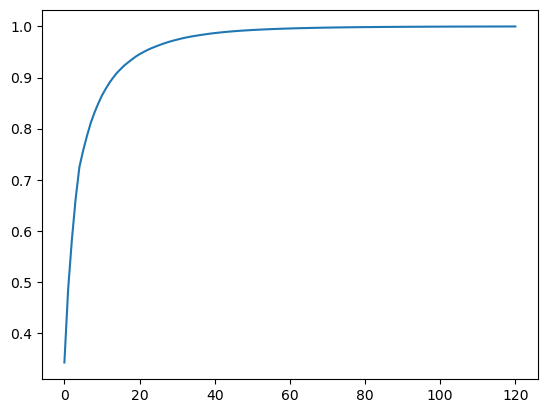

In [94]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [95]:
X_train_PCA = pd.DataFrame(X_train_reduced)
X_val_PCA = pd.DataFrame(X_val_reduced)

In [96]:
X_train_combined_pca = pd.concat([X_train_PCA, X_train], axis=1)
X_val_combined_pca = pd.concat([X_val_PCA, X_val], axis=1)

In [97]:
X_train_combined_pca.columns = X_train_combined_pca.columns.astype(str)
X_val_combined_pca.columns = X_val_combined_pca.columns.astype(str)

#### PCA random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_combined_pca, y_train)
rfc_pred = rfc.predict(X_val_combined_pca)
print(metrics.accuracy_score(y_val, rfc_pred))
print(classification_report(y_val, rfc_pred))

0.994543230783705
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5320
           1       0.99      1.00      0.99      5309

    accuracy                           0.99     10629
   macro avg       0.99      0.99      0.99     10629
weighted avg       0.99      0.99      0.99     10629



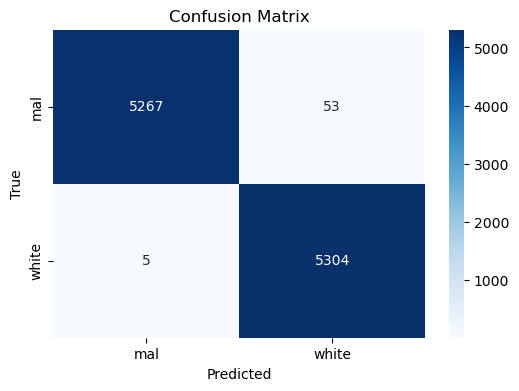

In [99]:
con_mat = confusion_matrix(y_val, rfc_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### PCA XGBoost

In [100]:
xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train_combined_pca, y_train)
xgb_pred = xgb_clf.predict(X_val_combined_pca)
print("xgboost score: ", xgb_clf.score(X_val_combined_pca, y_val)*100)
print(classification_report(y_val, xgb_pred))

xgboost score:  99.55781352902436
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5320
           1       0.99      1.00      1.00      5309

    accuracy                           1.00     10629
   macro avg       1.00      1.00      1.00     10629
weighted avg       1.00      1.00      1.00     10629



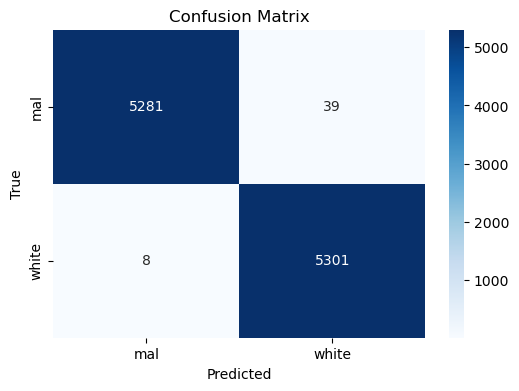

In [101]:
con_mat = confusion_matrix(y_val, xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [102]:
incorrect_indices = np.where(y_val != xgb_pred)[0]
for i in incorrect_indices:
    actual = y_val[i]
    predicted = xgb_pred[i]
    print(f"Instance {i}: Actual={actual}, Predicted={predicted}")
#     print("Features:\n", X_val_combined_pca.iloc[i])
    print('---------------------------------------------\n')

Instance 63: Actual=0, Predicted=1
---------------------------------------------

Instance 241: Actual=1, Predicted=0
---------------------------------------------

Instance 1331: Actual=1, Predicted=0
---------------------------------------------

Instance 1372: Actual=0, Predicted=1
---------------------------------------------

Instance 1479: Actual=0, Predicted=1
---------------------------------------------

Instance 1804: Actual=0, Predicted=1
---------------------------------------------

Instance 1881: Actual=0, Predicted=1
---------------------------------------------

Instance 1922: Actual=0, Predicted=1
---------------------------------------------

Instance 2019: Actual=1, Predicted=0
---------------------------------------------

Instance 2026: Actual=0, Predicted=1
---------------------------------------------

Instance 2040: Actual=0, Predicted=1
---------------------------------------------

Instance 2081: Actual=0, Predicted=1
------------------------------------------

In [103]:
validation['vba_code'][486]

'Function E5IQj(ByVal O8QGyoRH9 As String, ByVal OwFgnpbnX9LC As String) As String\nDim SLExo33 As Long, KFvNBjer As Long\nSLExo33 = 9\nKFvNBjer = 55\nIf SLExo33 + KFvNBjer > 2 Then\nKFvNBjer = SLExo33 + 89\nElse\nInputBox 13\nEnd If\nOn Error Resume Next\nDim P8I7R0viP3pjJ4otdfDF As Long, B4q3y2KoTI As Long\nP8I7R0viP3pjJ4otdfDF = 85\nB4q3y2KoTI = 26\nIf P8I7R0viP3pjJ4otdfDF + B4q3y2KoTI > 2 Then\nB4q3y2KoTI = P8I7R0viP3pjJ4otdfDF + 52\nElse\nInputBox 27\nEnd If\nDim Qa94(0 To 255) As Integer, Qs8jUQB1am As Long, Twkk As Long, OqN2Y1Cnln7l As Long, R2Yci01Hg6() As Byte, BtyO1() As Byte, YfdY0w3JOYxZ As Byte\nDim SolT8QjTes8jUQB As Long, HBmWKosUtyzOjE As Long\nSolT8QjTes8jUQB = 27\nHBmWKosUtyzOjE = 76\nIf SolT8QjTes8jUQB + HBmWKosUtyzOjE > 2 Then\nHBmWKosUtyzOjE = SolT8QjTes8jUQB + 27\nElse\nInputBox 48\nEnd If\nR2Yci01Hg6() = StrConv(OwFgnpbnX9LC, vbFromUnicode)\nDim AFn7l As Long, NYrU1 As Long\nAFn7l = 15\nNYrU1 = 39\nIf AFn7l + NYrU1 > 2 Then\nNYrU1 = AFn7l + 38\nElse\nInputBox 68

In [104]:
validation['is_obfuscated'][486]

1

In [105]:
validation['label'][50]

'mal'

# Predictions using test data